# Classification

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## MNIST

In [2]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
X, y=mnist['data'], mnist['target']
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

There are 70,000 images, and each image is 28 x 28 pixles, and each feature simply represents one pixel's intensity, from 0(shwitee) to 255(black). Let's take a peek all at one digit from the dataset. All you need to do is grab an instance's feaure vector, reshape it to 28 x 28 array, and display it using matplotlib's imshow() function:

(-0.5, 27.5, 27.5, -0.5)

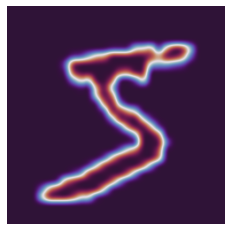

In [34]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

some_digit=X[0]
some_digit_image=some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap=cm.twilight_shifted, interpolation="quadric")
plt.axis("off")

In [8]:
y[0]

'5'

In [9]:
y[1]

'0'

(-0.5, 27.5, 27.5, -0.5)

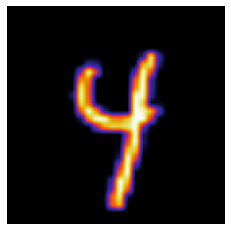

In [49]:
new_digit=X[26]
new_digit_image=new_digit.reshape(28, 28)
plt.imshow(new_digit_image, cmap=cm.CMRmap, interpolation="hamming")
plt.axis("off")


In [36]:
y[26]

'4'

In [50]:
y=y.astype(np.uint8)

In [51]:
y[36]

6

In [57]:
mns_data=X[23]
new_mns=mns_data.reshape(28, 28)

(-0.5, 27.5, 27.5, -0.5)

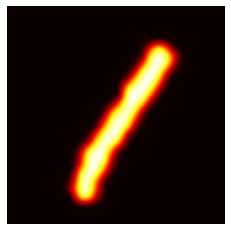

In [59]:
plt.imshow(new_mns, cmap=cm.hot, interpolation='bicubic')
plt.axis("off")

In [60]:
X_train, X_test, y_train, y_test=X[:60000], X[60000:], y[:60000], y[60000:]

## Training a Binary Classifier

In [61]:
y_train_5=(y_train==5) # True for all 5s and False for all other digits.
y_test_5=(y_test==5)

Stochastic Gradient Descent(SGD) classifier has the advantage of handling very large datasets efficiently.
This is in part because SGD deals with training instances independently, one at a time which also makes SGD well suited for online learning). 

In [62]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

###### The SGDClassifier relies on randomness during training(hence the name "scholastic"). If you wwant reproducible results, you should set the random_state parameter.

In [69]:
sgd_clf.predict([X[0]])

array([ True])

## Performance Measures

### Measuring accuracy using Cross-Validation

In [70]:
import PIL.Image as img

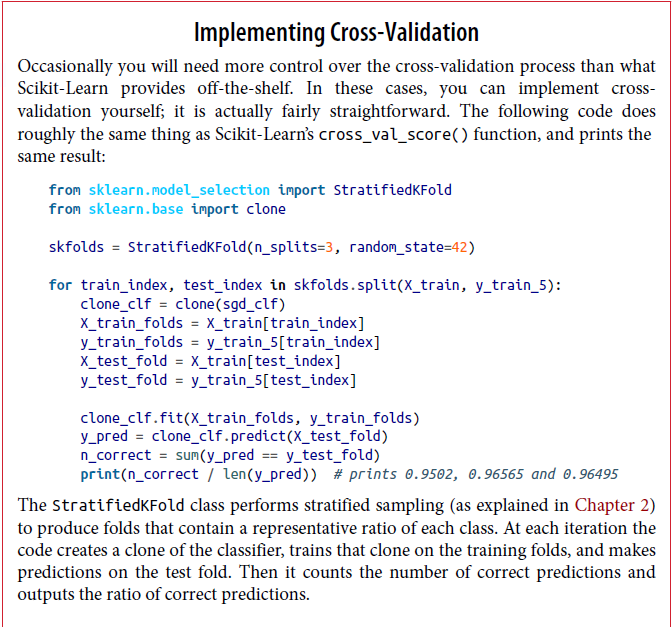

In [71]:
img.open("Capture.PNG")

In [74]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [79]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [80]:
never_5_clf=Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

It has over 90% accuracy! This is simply because only about 10% of the immages are 5s, so if you always  guess that an image is not  a 5, you will be right about 90% of times . 
This demonstrates why accuracy is not  preferred performance measure for classifiers, especially when you are dealing with skewed datasets(i.e, when some classes are much more frequent than others).

### Confusion Matrix

A much better way to evaluate the performance of a classifier is to look at the confusion matrix. The general idea is to count the number of times instance of CLass A are classified as  class B. For example, to know the  number  of times  the classifier confused images of 5s with 3s, you woulld look in the 5th row and 3rd column of the confusion matrix. 

To compute the confusion matrix, you first need to have a set predictions, so they can be compared to the actual targets. You could make predictions on the test set, but let's keep it untouched for now(remember that you want to use the test set onlly at the very end of your project, once you have a classifier that you are ready to launch).
Instead, you can use the cross_val_predict() function: 

In [81]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

Just like the cross_val_score() function, cross_val_predict() performs K-fold-cross-validation, but instead of returning the evaluation, it returns the predictions made on each test fold. This means that you get a clean predictions for each instance in the training set("clean" meaning that the prediction is made by a model that never ssaw the data during training).

Now you are ready to get the confusion matrix using the confusion_matrix() function. Just pass it the target classes (y_train_5) and the predicted classes(y_train_pred):

In [84]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

Each row in a confusion matrix represents an actual class, while each column represents a predicted class. The first row of this matrix considers non-5 images (the negative class): 53892 of them are correctly classified as non-5s (they are called true negatives), while the remaining 687 were wrongly classified as 5s (false positives). The second row considers the images of 5s (the positive class): 1891 were wrongly classified as non-5s (false negatives), while the remaining 3530 were correctly classified as 5s (true positives). A perfect classifier would have only true positives and true negatives, so its confusion matrix would have nonzero values only on its main diagonal(top left to bottom right)

In [86]:
y_train_perfect_predictions=y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

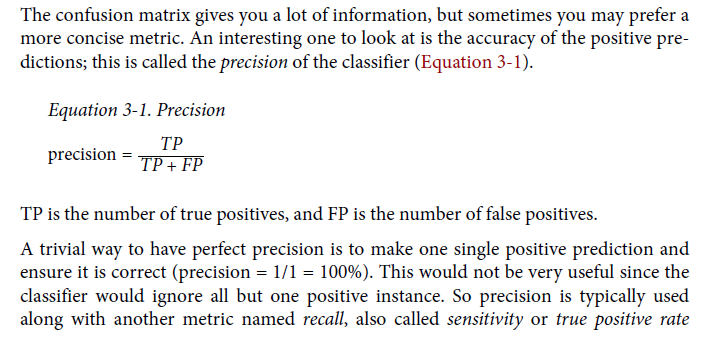

In [88]:
img.open("Capture1.PNG")

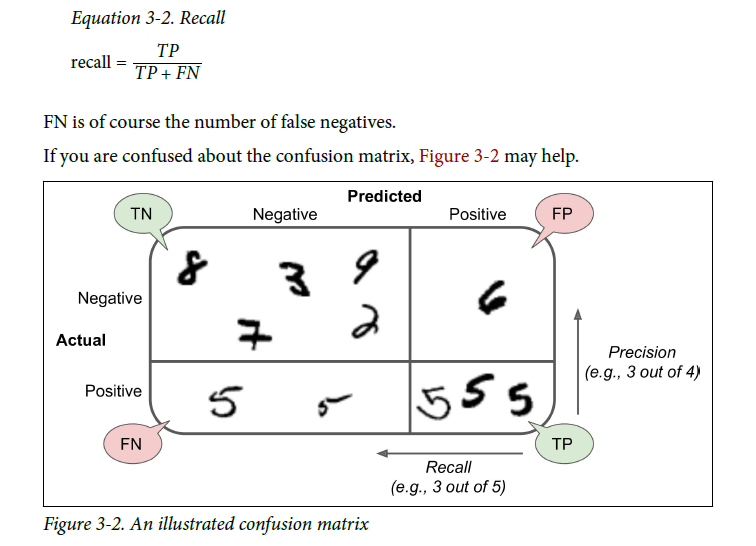

In [90]:
img.open("recall.PNG")

### Precision and Recall

In [93]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5, y_train_pred)) #== 3530/(3530+687)
print(recall_score(y_train_5, y_train_pred)) #== 3530/(3530+1891)


0.8370879772350012
0.6511713705958311


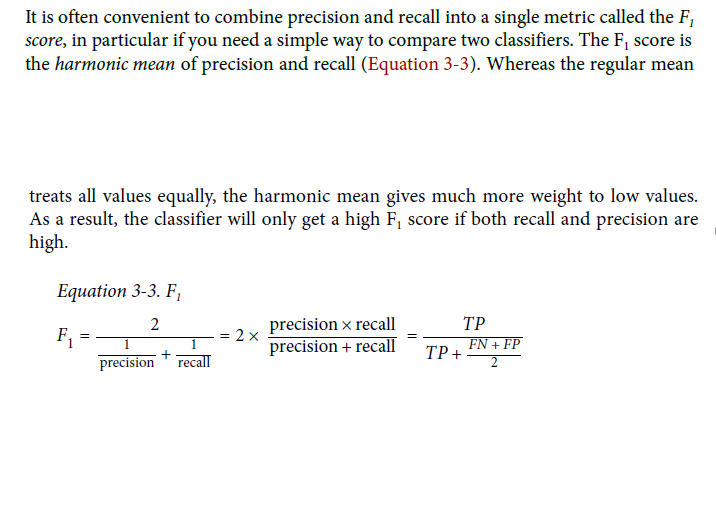

In [94]:
img.open("tempsnip.PNG")

In [95]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)


0.7325171197343846

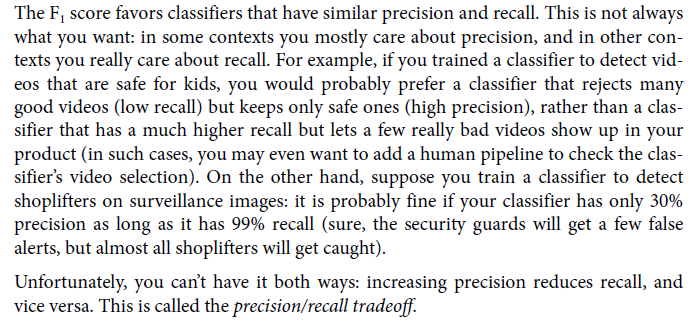

In [97]:
img.open("Capture3.PNG")

### Precision/Recall Tradeoff

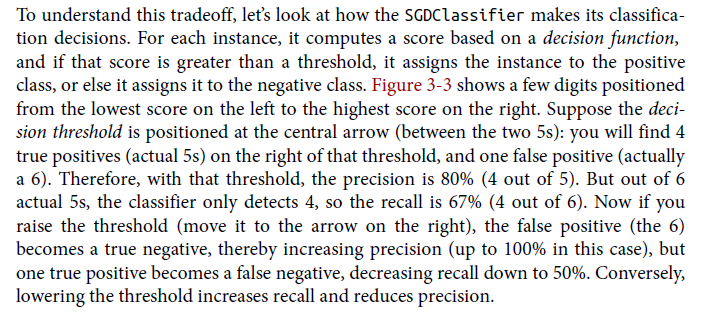

In [100]:
img.open("Capture4.PNG")

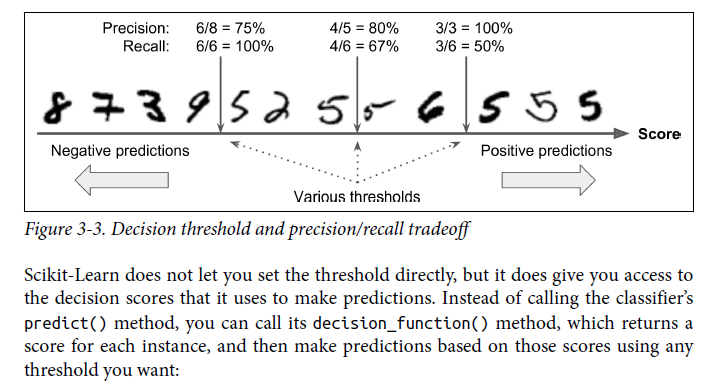

In [102]:
img.open("Capture5.PNG")

In [105]:
y_scores = sgd_clf.decision_function([some_digit])
print(y_scores)
threshold = 0
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

[2164.22030239]
[ True]


In [107]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
method="decision_function")
y_scores


array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

Now with these scores you can compute precision and recall for all possible thresholds
using the precision_recall_curve() function:

In [108]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

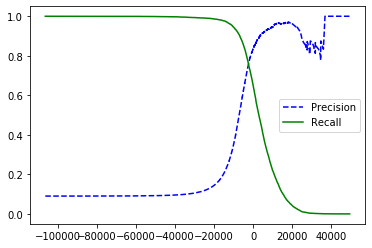

In [115]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.legend()
    [...]# highlight the threshold, add the legend, axis label and grid
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

You can see that precision really starts to fall sharply around 80% recall. You will
probably want to select a precision/recall tradeoff just before that drop—for example,
at around 60% recall. But of course the choice depends on your project.
So let’s suppose you decide to aim for 90% precision. You look up the first plot and
find that you need to use a threshold of about 8,000. To be more precise you can
search for the lowest threshold that gives you at least 90% precision (np.argmax()
will give us the first index of the maximum value, which in this case means the first
True value):

In [116]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] # ~7816
y_train_pred_90 = (y_scores >= threshold_90_precision)
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [117]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

### The ROC Curve

The receiver operating characteristic (ROC) curve is another common tool used with
binary classifiers. It is very similar to the precision/recall curve, but instead of plotting
precision versus recall, the ROC curve plots the true positive rate (another name
for recall) against the false positive rate. The FPR is the ratio of negative instances that
are incorrectly classified as positive. It is equal to one minus the true negative rate,
which is the ratio of negative instances that are correctly classified as negative. The
TNR is also called specificity. Hence the ROC curve plots sensitivity (recall) versus
1 – specificity.
To plot the ROC curve, you first need to compute the TPR and FPR for various threshold
values, using the roc_curve() function:

In [118]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

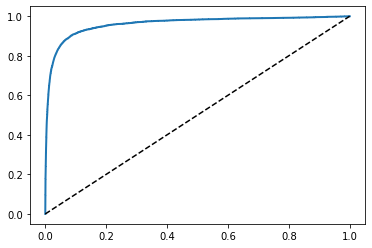

In [122]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    
    [...] # Add axis labels and grid
plot_roc_curve(fpr, tpr)
plt.show()

Once again there is a tradeoff: the higher the recall (TPR), the more false positives
(FPR) the classifier produces. The dotted line represents the ROC curve of a purely
random classifier; a good classifier stays as far away from that line as possible (toward
the top-left corner).
One way to compare classifiers is to measure the area under the curve (AUC). A perfect
classifier will have a ROC AUC equal to 1, whereas a purely random classifier will
have a ROC AUC equal to 0.5. Scikit-Learn provides a function to compute the ROC
AUC:

In [123]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

Let’s train a RandomForestClassifier and compare its ROC curve and ROC AUC
score to the SGDClassifier. First, you need to get scores for each instance in the
training set. But due to the way it works (see Chapter 7), the RandomForestClassi
fier class does not have a decision_function() method. Instead it has a pre
dict_proba() method. Scikit-Learn classifiers generally have one or the other. The
predict_proba() method returns an array containing a row per instance and a column
per class, each containing the probability that the given instance belongs to the
given class (e.g., 70% chance that the image represents a 5):

In [135]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
method="predict_proba")
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

C:\Users\AMIT\Anaconda3\anacondapy\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\AMIT\Anaconda3\anacondapy\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\AMIT\Anaconda3\anacondapy\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Multiclass Classification

one way to create a system that can classify the digit images into 10
classes (from 0 to 9) is to train 10 binary classifiers, one for each digit (a 0-detector, a
1-detector, a 2-detector, and so on). Then when you want to classify an image, you get
the decision score from each classifier for that image and you select the class whose
classifier outputs the highest score. This is called the one-versus-all (OvA) strategy
(also called one-versus-the-rest).

Another strategy is to train a binary classifier for every pair of digits: one to distinguish
0s and 1s, another to distinguish 0s and 2s, another for 1s and 2s, and so on.
This is called the one-versus-one (OvO) strategy. If there are N classes, you need to
train N × (N – 1) / 2 classifiers. For the MNIST problem, this means training 45
binary classifiers! When you want to classify an image, you have to run the image
through all 45 classifiers and see which class wins the most duels. The main advantage
of OvO is that each classifier only needs to be trained on the part of the training
set for the two classes that it must distinguish.

Some algorithms (such as Support Vector Machine classifiers) scale poorly with the
size of the training set, so for these algorithms OvO is preferred since it is faster to
train many classifiers on small training sets than training few classifiers on large
training sets. For most binary classification algorithms, however, OvA is preferred.

In [125]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [126]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [127]:
np.argmax(some_digit_scores)

3

In [128]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [130]:
sgd_clf.classes_[3]

3

If you want to force ScikitLearn to use one-versus-one or one-versus-all, you can use
the OneVsOneClassifier or OneVsRestClassifier classes. Simply create an instance
and pass a binary classifier to its constructor. For example, this code creates a multiclass
classifier using the OvO strategy, based on a SGDClassifier:

In [131]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([5], dtype=uint8)

In [132]:
len(ovo_clf.estimators_)

45

In [136]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

C:\Users\AMIT\Anaconda3\anacondapy\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([5], dtype=uint8)

In [137]:
forest_clf.predict_proba([some_digit])

array([[0. , 0. , 0. , 0.2, 0. , 0.8, 0. , 0. , 0. , 0. ]])

In [138]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87082583, 0.87089354, 0.88628294])

In [139]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

C:\Users\AMIT\Anaconda3\anacondapy\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.89957009, 0.89344467, 0.89963495])

### Error Analysis

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

C:\Users\AMIT\Anaconda3\anacondapy\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray)

This confusion matrix looks fairly good, since most images are on the main diagonal,
which means that they were classified correctly. The 5s look slightly darker than the
other digits, which could mean that there are fewer images of 5s in the dataset or that
the classifier does not perform as well on 5s as on other digits. In fact, you can verify
that both are the case.
Let’s focus the plot on the errors. First, you need to divide each value in the confusion
matrix by the number of images in the corresponding class, so you can compare error
rates instead of absolute number of errors (which would make abundant classes look
unfairly bad):